###### Data source : https://archive.ics.uci.edu/ml/datasets/heart+disease


###### Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.


###### Objectives:
    
1. Loading the dataset

2. Explaining the features and target variable

3. Dealing with the missing values

4. Performing One-hot Encoding

5. Splitingt the dataset into 80% training and 20% for testing. Add random state and stratification

6. Performing the training with Decision Tree Classifier

7. Showing a tree diagram of the Decision Tree

8. Showing the Confusion Matrix, Classification report, and ROC-AUC

9. Explaining outcome.

###### Importing libraries

In [1499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')


###### Data Importing and preprocessing 

In [1500]:
df = pd.read_csv("processed.cleveland.csv")
df.columns =['age', 'sex', 'cp', 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

display(df.head(10))
print(df.shape)
display(df.isna())
display(df.isna().sum())
print(df.info())
print(df.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


(302, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,False,False,False,False,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  num       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB
None
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


###### Attribute Information:
    
1. age: age in years


2. sex: sex (1 = male; 0 = female)


3. cp : chest pain type -- Value 1: typical angina-- Value 2: atypical angina-- Value 3: non-anginal pain-- Value 4: asymptomatic


4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)


5. chol : serum cholestoral in mg/dl


6. fbs : fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


7. restecg : resting electrocardiographic results -- Value 0: normal-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


8. thalach : maximum heart rate achieved


9. exang : exercise induced angina (1 = yes; 0 = no)

10.oldpeak : ST depression induced by exercise relative to rest

11.slope  :  the slope of the peak exercise ST segment-- Value 1: upsloping-- Value 2: flat-- Value 3: downsloping

12.ca : number of major vessels (0-3) colored by flourosopy

13.thal : 3 = normal; 6 = fixed defect; 7 = reversable defect

14.num : (the predicted attribute) diagnosis of heart disease (angiographic disease status)

Refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4


###### Formatting data:Finding the missing values

In [1501]:
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [1502]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [1503]:
len(df.loc[(df['ca']=='?')
          |
          (df['thal']=='?')])

6

In [1504]:
df_no_missing = df.loc[(df['ca']!='?')
                &
                (df['thal'] !='?')]

In [1505]:
len(df_no_missing)

296

In [1506]:
df_no_missing['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0'], dtype=object)

In [1507]:
df_no_missing['thal'].unique()

array(['3.0', '7.0', '6.0'], dtype=object)

In [1508]:
X = df_no_missing.drop('num',axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0


In [1509]:
y = df_no_missing['num'].copy()
y.head()

0    2
1    1
2    0
3    0
4    0
Name: num, dtype: int64

###### One-hot Encoding

Now that we have spit the dataframe into two pieces, X, which contains the data we will use to predict classifications, and y, which contains the known classifications in our training dataset, we need to take a closer look at the variables in X.The list below tells us what each variable represents and the type of data (float or categorical) it should contain

    • 1.age, Float

    • 2.sex-Category

                    0-female
                    1-male

    • 3.cp, chest pain, Category

                                1-typical angina ,
                                2- atypical angina,
                                3-non-anginal pain,
                                4- asymptomatic

    • 4.restbp, resting blood pressure (in mm Hg), Float

    • 5.chol, serum cholesterol in mg/dl, Float

    • 6.fbs, fasting blood sugar,Category

    • 7.restecg resting electrocardiographic results, Category

                                                              1-normal
                                                              2-having ST-T wave abnormality
                                                              3- showing probable or definite left ventricular hypertrophy
  
    • 8. thalach : maximum heart rate achieved,float

    • 9. exang : exercise induced angina (1 = yes; 0 = no),category

    • 10.oldpeak : ST depression induced by exercise relative to rest,float

    •11.slope  : the slope of the peak exercise ST segment ,Category
                                                                    1-upsloping
                                                                    2-flat
                                                                    3-downsloping

    • 12. ca ,number of major vessels (0-3) colored by fluoroscopy, Float

    • 13. thal, thailurts heart scan, Category

                                              3-normal (no cold spots)

                                              6-fixed defect (cold spots during rest and exercise)

                                              7-reversible defect (when cold spots only appear during exercise)
                                              
     • 14.num : (the predicted attribute) diagnosis of heart disease (angiographic disease status)                                        

In [1510]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

##### We see here age,trestbp,chol and thalach are all float.

##### Here cp,restecg,slope,thal are categorical variables and they have more than 2 categoris.

In [1511]:
X['cp'].unique()

array([4., 3., 2., 1.])

In [1512]:
X['restecg'].unique()

array([2., 0., 1.])

In [1513]:
X['slope'].unique()

array([2., 3., 1.])

In [1514]:
X['thal'].unique()

array(['3.0', '7.0', '6.0'], dtype=object)

In [1515]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
1,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
3,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,1,0,0


In [1516]:
pd.get_dummies(X, columns=['restecg']).head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,restecg_0.0,restecg_1.0,restecg_2.0
0,67.0,1.0,4.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1,0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,1
4,56.0,1.0,2.0,120.0,236.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,1,0,0


In [1517]:
pd.get_dummies(X, columns=['slope']).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,slope_1.0,slope_2.0,slope_3.0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,3.0,3.0,0,1,0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,7.0,0,1,0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,3.0,0,0,1
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,3.0,1,0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,0.0,3.0,1,0,0


In [1518]:
pd.get_dummies(X, columns=['thal']).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1,0,0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,0,0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,1,0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,1,0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,1,0,0


In [1519]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [1520]:
y.unique()
y_not_zero_index = y>0
y[y_not_zero_index] = 1
y.unique()

array([1, 0], dtype=int64)

###### Building a Preliminary classification tree

In [1521]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(236, 22) (60, 22) (236,) (60,)


In [1522]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)

[Text(429.3984375, 385.05, 'cp_4.0 <= 0.5\ngini = 0.499\nsamples = 236\nvalue = [123, 113]\nclass = No HD'),
 Text(209.25, 339.75, 'slope_2.0 <= 0.5\ngini = 0.349\nsamples = 120\nvalue = [93, 27]\nclass = No HD'),
 Text(113.34375, 294.45, 'trestbps <= 185.0\ngini = 0.186\nsamples = 77\nvalue = [69, 8]\nclass = No HD'),
 Text(95.90625, 249.15, 'age <= 56.5\ngini = 0.167\nsamples = 76\nvalue = [69, 7]\nclass = No HD'),
 Text(34.875, 203.85, 'slope_3.0 <= 0.5\ngini = 0.04\nsamples = 49\nvalue = [48, 1]\nclass = No HD'),
 Text(17.4375, 158.55, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]\nclass = No HD'),
 Text(52.3125, 158.55, 'trestbps <= 115.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(34.875, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes HD'),
 Text(69.75, 113.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = No HD'),
 Text(156.9375, 203.85, 'age <= 59.5\ngini = 0.346\nsamples = 27\nvalue = [21, 6]\nclass = No HD'),
 Text(122.0625, 158.55, 'tre

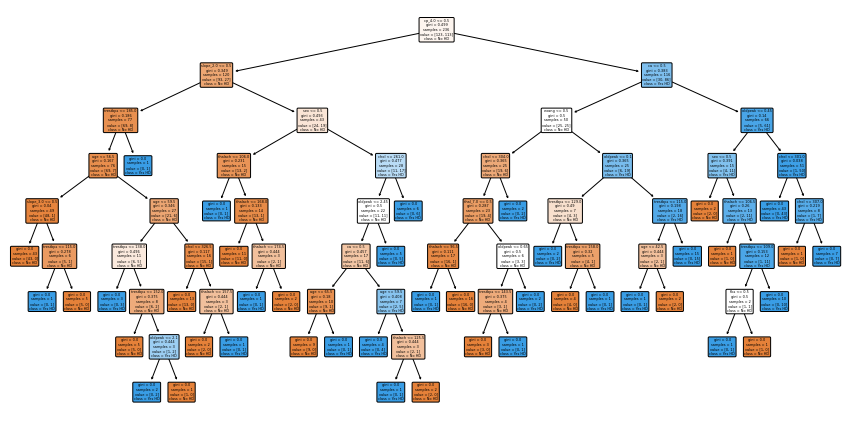

In [1523]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=["No HD","Yes HD"],
         feature_names=X_encoded.columns)

###### Confusion Matrix

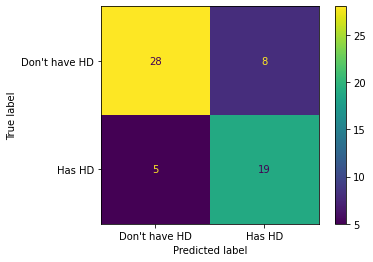

In [1524]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Don't have HD","Has HD"])


##### Confusion matrix shows:
    Person not having HD (28+8)=36 , 28 (77%) of them are correctly predicted 
    Person having HD (19+5)=24 , 19 (79%) of them are correctly predicted

In [1525]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas[:-1]

clf_dts =[]

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0 ,ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

In [1526]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

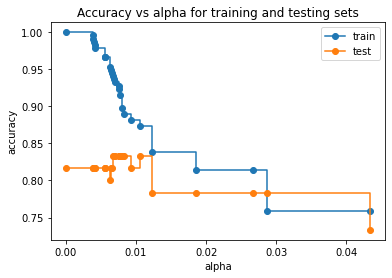

In [1527]:
fig, ax= plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas ,train_scores, marker='o',label='train',drawstyle="steps-post")
ax.plot(ccp_alphas ,test_scores, marker='o',label='test',drawstyle="steps-post")
ax.legend()
plt.show()

###### In the graph above ,we see that the accuracy for the esting dataset hits its maximum value when alpha is about 0.012.After this value for alpha,the accuracy of the testing dataset drops off and that suggests we should set ccp_alpha 0.012